<h1 align="center">Medical Appointment No Shows Analysis</h1> 

![healthline](https://post.healthline.com/wp-content/uploads/2020/07/doctor-doing-a-medical-exam-1296x728-header.jpg)

<h2>Table of Contents</h2>
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='introduction'></a>
## Introduction

### About Dataset
##### Dataset link: https://www.kaggle.com/joniarroba/noshowappointments

##### Context

>The dataset collects information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. This project is investigating the Medical Appointment No Shows dataset, which contains historical data for more than 110K appointments made accross different medical facilities in Brazil for more than 60k patients. A number of characteristics about the patient are:

##### Data Dictionary
>1. PatientId: Identification of a patient
>2. AppointmentID: Identification of each appointment
>3. Gender: (Male or Female)
>4. Scheduled Day: The day of the actuall appointment, when they have to visit the doctor.
>5. Appointment Day: The day someone called or registered the appointment, this is before appointment of course.
>6. Age: How old is the patient.
>7. Neighbourhood: Where the appointment takes place.
>8.Scholarship: (Yes or No)
>9. Hipertension: (Yes or No)
>10. Diabetes: (Yes or No)
>11. Alcoholism: (Yes or No)
>12. Handcap: (**This will be later be clarified as we continue**), 
>13. SMS_received: (1 or more messages sent to the patient)
>14. No-show: (True or False). - **Note**: No, means the patient showed up for the appointment and yes, means the patient didn't show up. **This also will be later be substituted as we continue for easy interpretation**

<a id='top'></a>
### Questions for Analysis

<a href="#Q1">1. Distribution of Patient's Age.</a></li></br>
<a href="#Q2">2. Is there a relationship between gender and showing up for appointments?</a></li></br>
<a href="#Q3">3. Is there a relationship between Neighbourhood and showing up for appointments?</a></li></br>
<a href="#Q4">4. Is there a relationship between alcoholism and showing for appointments?</a></li></br>
<a href="#Q5">5. Is there a relationship between individual illments and showing for appointments?</a></li></br>
<a href="#Q6">6. Does waiting time affect showing up for appointments?</a></li></br>
<a href="#Q7">7. Is there a relationship between scholarship and showing for appointments?</a></li></br>
<a href="#Q8">8. Is there a relationship between absence of "scholarship, illments, alcholism" and showing for appointments?</a></li></br>
<a href="#Q9">9: Is there a relationship between SMS Recieved and showing for appointments?</a></li>


###### Importation of packages

In [1]:
# first i will import the packages needed in the project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.
>I will also perform operations to inspect data types and look for instances of missing or possibly errant data.

In [2]:
# Load your data and print out a few lines. 
df=pd.read_csv('./noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### General Properties
> In this subsection, I will be checking the general properties (such as data shape(number of rows and columns), data types, null values, duplicate rows and a summary statistics) of the dataset. 

In [3]:
# Checking number of rows and columns
print ('There are', df.shape[0], 'rows and ', df.shape[1], 'columns')

There are 110527 rows and  14 columns


In [4]:
#Checking the data types of each feature.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# Checking for missing values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [7]:
# Getting Summary statistics of Age
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### Observations
> After checking the general properties of the dataset, I observed that there are *110527 rows and  14 columns* and *no missing values and duplicate rows*

> But looking at the summary statistics of age, I observed that the minimum age is negative which should not be so.
> This error will be corrected in the Data Cleaning subsection.

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning (Replace this with more specific notes!

> In this section, I will drop unnecessary features, drop Age with values less than 0, create new feature (waiting time) and replace the values of some features(such as Gender, Scholarship, Hipertension, Diabetes, Alcoholism)

In [9]:
# Dropping features/columns that i won't be needing (PatientId and AppointmentID)
df.drop(columns=['PatientId','AppointmentID'], inplace=True)

In [10]:
#To confirm if the features have been dropped
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


##### Working with the ScheduledDay	and AppointmentDay

In [11]:
# Converting the Schedule and Appointment Day feature to date type
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date
df[['ScheduledDay', 'AppointmentDay']].head()

,ScheduledDay,AppointmentDay
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29


In [12]:
# Creating a new feature/column (Waiting time), which is the difference between Appointment Day and Scheduled Day
df['Waiting_time'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0


In [13]:
#Checking the summary Statistics for the waiting time
df['Waiting_time'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_time, dtype: float64

#### Converting scholarship, hipertension, diabetes, and alcoholism

> First I'll check the columns' unique values.

In [14]:
print(f'"Scholarship" unique values: {df.Scholarship.unique()}')
print(f'"Hipertension" unique values: {df.Hipertension.unique()}')
print(f'"Diabetes" unique values: {df.Diabetes.unique()}')
print(f'"Alcoholism" unique values: {df.Alcoholism.unique()}')

"Scholarship" unique values: [0 1]
"Hipertension" unique values: [1 0]
"Diabetes" unique values: [0 1]
"Alcoholism" unique values: [0 1]


As you can see above, all of them are only of values 1's and 0's, so they are safe to be converted into boolean. What I mean by safe is: safe to be converted into boolean without altering the meaning of the columns. This point is crucial when we're dealing with the handicap and sms_received columns in the next section. I'll then convert them into boolean below.

In [15]:
df.Scholarship = df.Scholarship.astype(bool)
df.Hipertension = df.Hipertension.astype(bool)
df.Diabetes = df.Diabetes.astype(bool)
df.Alcoholism = df.Alcoholism.astype(bool)

In [16]:
df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism']].head()

,Scholarship,Hipertension,Diabetes,Alcoholism
0,False,True,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,True,False


In [17]:
df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Scholarship   110527 non-null  bool 
 1   Hipertension  110527 non-null  bool 
 2   Diabetes      110527 non-null  bool 
 3   Alcoholism    110527 non-null  bool 
dtypes: bool(4)
memory usage: 431.9 KB


The info above confirms that those columns are now of type boolean.

In [18]:
df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism']].describe()

,Scholarship,Hipertension,Diabetes,Alcoholism
count,110527,110527,110527,110527
unique,2,2,2,2
top,False,False,False,False
freq,99666,88726,102584,107167


#### Processing handicap and sms_received
> I assumed that handicap and sms_received columns were swapped by each other. Below I'll show you the reason why. First let's see the unique values of both columns.

In [19]:
print(f'"handicap" unique values: {df.Handcap.unique()}')
print(f'"sms_received" unique values: {df.SMS_received.unique()}')

"handicap" unique values: [0 1 2 3 4]
"sms_received" unique values: [0 1]


As you can see above, handicap values consists of integers from 0 to 4, whereas values of sms_received is only 1 or 0. However, in the dataset description, it says that handicap is boolean value of whether the patient is handicapped or not, whereas sms_received is the number of messages received by the patient. The actual values, however, shows that the nature of handicap suits better for integer, whereas sms_received suits better for boolean, which is not what is expected from the dataset description. In this case, despite  that those columns are next to each other, I don't believe that they're swapped by the creator of the dataset.

> Here is why: JoniHoppen (Dataset Creator) said ***"...the handcap refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2. The problem is that patients with 1 handcap becomes unclear if this is blindness or antyhing else."*** cite: https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699

> Creator also commented that ***"SMS is no binary, some people receive more 0 1 or 2 sms messages. Handcap is binary indeed, anyvalue outside it is erros on the data."*** https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/30844?page=2


I believe this information is accurate, and as the SMS column shows that no patient recieved more than 1 SMS reminder. Since this is so, i will also convert the SMS column to be a Bool( i.e True of False)

I will also correct the spelling of Handicap, from "Handcap" to "Handicap"

In [20]:
#converting SMS Recieved Coulmn
df.SMS_received = df.SMS_received.astype(bool)

In [21]:
df.rename(columns={'Handcap': 'Handicap'}, inplace=True)

In [22]:
df[['Handicap', 'SMS_received']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Handicap      110527 non-null  int64
 1   SMS_received  110527 non-null  bool 
dtypes: bool(1), int64(1)
memory usage: 971.6 KB


The info above now shows that handicap is  integer, and sms_received stays as correctly typed as boolean

#### Converting no_show into show_up
>Firstly I'll convert the no_show column into boolean, then I'll convert the column to be a show_up column (with all the original boolean values inverted) to have a column that says whether the patient shows up for the appointment or not. I believe this new show_up column is more intuitive.

> First i will ensure that the unique values of no_show is safe to be converted into boolean.

In [23]:
df.rename(columns={'No-show': 'no_show'}, inplace=True)
print(f'"no_show" unique values: {df.no_show.unique()}')

"no_show" unique values: ['No' 'Yes']


Now we can see that no_show only consists of values 'Yes' or 'No', so it is safe to convert the column into boolean.

In [24]:
df.no_show = df.no_show.apply(lambda x: x == 'Yes')
print(f'"no_show" unique values: {df.no_show.unique()}')

"no_show" unique values: [False  True]


In [25]:
# To comfirm
df.no_show.dtype

dtype('bool')

The above prints show that now the no_show column are correctly of type boolean. I'll then now proceed to convert this column into show_up column, where I'll invert the original boolean values.

In [26]:
df['show_up'] = ~df.no_show
df[['no_show', 'show_up']].head()

,no_show,show_up
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


As you can see above, the value of the show_up is correctly calculated from the no_show column. I'll now drop the no_show column as it is no longer useful

In [27]:
df.drop(columns='no_show', inplace=True)
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'Waiting_time', 'show_up'],
      dtype='object')

The above print confirms that the column no_show has been removed.

#### Remaining columns...
For the remaining columns which are gender, age, and neighbourhood, their data types already matches their purpose, so they're good to go.

#### Column Data Types Conclusion
This concludes the column data types processing. Below I'll show the final state of the column data types, and their values.

In [28]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Waiting_time,show_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,0,True
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,0,True
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,0,True
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,0,True
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,0,True


Looks Okay 😔

### Fixing Column Values
In this section, I'll explore and fix the values of the columns.

#### Fixing age values
Firstly let's analyze the numeric columns.

In [29]:
df.describe()

,Age,Handicap,Waiting_time
count,110527.000000,110527.000000,110527.000000
mean,37.088874,0.022248,10.183702
std,23.110205,0.161543,15.254996
min,-1.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000
50%,37.000000,0.000000,4.000000
75%,55.000000,0.000000,15.000000
max,115.000000,4.000000,179.000000


Handicap seems to be good, but age and Waiting_time columns seems to be problematic. The columns seems to have negative minimum value, which does not makes sense. Now let's see the distribution of the value of age below.

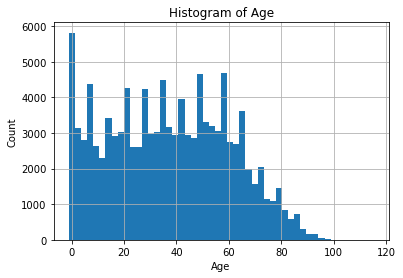

In [30]:
df.Age.hist(bins=50)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count');

There seems to be smooth distribution of the values near 0, so kind of makes sense to have very low values for age (for babies for example). This opens the possibility that the -1 age might be fixed to become age of 0. So now let's count how many data there is that have age lower than 0.

In [31]:
df.query('Age<0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Waiting_time,show_up
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,False,False,False,False,0,False,0,True


Number of rows with negative valued age is 1

There is only one row that has negative age, which means this is indeed a noise. To be safe and to avoid any wrong assumption, I'll just drop this single row with negative age.

In [32]:
df.drop(df[df.Age < 0].index, inplace=True)

In [33]:
#Now let's see the new distribution of age:

df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [34]:
df.query('Waiting_time<0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Waiting_time,show_up
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,False,False,False,False,1,False,-1,False
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,False,False,False,False,1,False,-1,False
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,False,False,False,False,0,False,-1,False
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,False,False,False,False,0,False,-6,False
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,False,False,False,False,0,False,-1,False


Since they're not a lot (only 5 rows  of negative waiting times), to avoid any wrong assumption, we'll just drop the rows with this invalid Waiting Times.

In [35]:
df.drop(df.query('Waiting_time<0').index, inplace=True)

In [36]:
# lets see our waiting time distribution
df.Waiting_time.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_time, dtype: float64

### Confirming validity of gender
Firstly, let's check the gender unique values.

In [37]:
print(f'"gender" unique values: {df.Gender.unique()}')

"gender" unique values: ['F' 'M']


Gender looks good.

### Confirming validity of neighbourhood
As for neighbourhood, let's see the unique values as well. Also, we'll sort the values to check for possible typo (any typo will have more or less similar value, so sorting might help).

In [38]:
neighbourhood_values = df.Neighbourhood.unique()
neighbourhood_values.sort()
print('\n'.join(neighbourhood_values))

AEROPORTO
ANDORINHAS
ANTÔNIO HONÓRIO
ARIOVALDO FAVALESSA
BARRO VERMELHO
BELA VISTA
BENTO FERREIRA
BOA VISTA
BONFIM
CARATOÍRA
CENTRO
COMDUSA
CONQUISTA
CONSOLAÇÃO
CRUZAMENTO
DA PENHA
DE LOURDES
DO CABRAL
DO MOSCOSO
DO QUADRO
ENSEADA DO SUÁ
ESTRELINHA
FONTE GRANDE
FORTE SÃO JOÃO
FRADINHOS
GOIABEIRAS
GRANDE VITÓRIA
GURIGICA
HORTO
ILHA DAS CAIEIRAS
ILHA DE SANTA MARIA
ILHA DO BOI
ILHA DO FRADE
ILHA DO PRÍNCIPE
ILHAS OCEÂNICAS DE TRINDADE
INHANGUETÁ
ITARARÉ
JABOUR
JARDIM CAMBURI
JARDIM DA PENHA
JESUS DE NAZARETH
JOANA D´ARC
JUCUTUQUARA
MARIA ORTIZ
MARUÍPE
MATA DA PRAIA
MONTE BELO
MORADA DE CAMBURI
MÁRIO CYPRESTE
NAZARETH
NOVA PALESTINA
PARQUE INDUSTRIAL
PARQUE MOSCOSO
PIEDADE
PONTAL DE CAMBURI
PRAIA DO CANTO
PRAIA DO SUÁ
REDENÇÃO
REPÚBLICA
RESISTÊNCIA
ROMÃO
SANTA CECÍLIA
SANTA CLARA
SANTA HELENA
SANTA LUÍZA
SANTA LÚCIA
SANTA MARTHA
SANTA TEREZA
SANTO ANDRÉ
SANTO ANTÔNIO
SANTOS DUMONT
SANTOS REIS
SEGURANÇA DO LAR
SOLON BORGES
SÃO BENEDITO
SÃO CRISTÓVÃO
SÃO JOSÉ
SÃO PEDRO
TABUAZEIRO
UNIVERSITÁ

There seems to be no obvious typo from the values of the neighbourhood. One last check is to see the value with the minimum count, which might show typo as well.

In [39]:
df.Neighbourhood.value_counts().idxmin()

'PARQUE INDUSTRIAL'

As you can see, the value with minimum count seems to be a valid value, showing that no typo occurs in this column. Hence, this column is good to go.

### I would like to see the head and tail of our data table

In [40]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Waiting_time,show_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,0,True
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,0,True
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,0,True
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,0,True
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,0,True,35,True
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,0,True,35,True
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,0,True,41,True
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,0,True,41,True


## End Data Wrangling
It would be good to the cleaned data.

In [41]:
df.to_csv('./medical_appointment_no_show_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Data Overview
Firstly we'll load the checkpoint data, and reprint the data here so that we can see the data easily without scrolling up.

In [42]:
data = pd.read_csv('./medical_appointment_no_show_cleaned.csv',
                 infer_datetime_format=True)

In [43]:
data.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Waiting_time,show_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,0,True
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,0,True
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,0,True


True     88207
False    22314
Name: show_up, dtype: int64
True     79.81017182254956%
False    20.18982817745044%
Name: show_up, dtype: object


<AxesSubplot:>

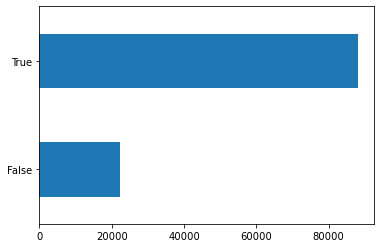

In [44]:
print(data['show_up'].value_counts())
print(data['show_up'].value_counts(normalize=True).mul(100).astype(str)+'%')
data['show_up'].value_counts().sort_values().plot(kind = 'barh')

<a id='Q1'></a>
### Research Question 1. Distribution of Patient's Age

<a href="#top">List of Questions</a>

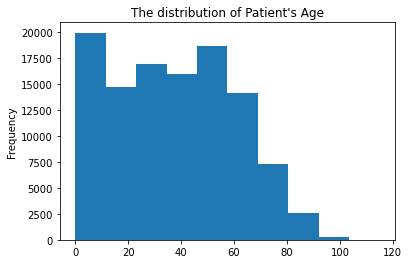

In [45]:
data['Age'].plot(kind='hist', title='The distribution of Patient\'s Age');

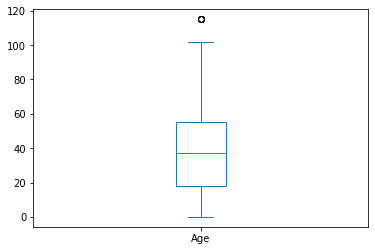

In [46]:
data['Age'].plot(kind='box');

## Note: The Pearson’s Chi-Square statistical hypothesis will be used.

> A test for independence between categorical variables. A Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables.

>$H_0$: There is no statistically significant relationship between **'the variable(s)'** and showing up for appointment.

>$H_a$:There is a statistically significant relationship between **'the variable(s)'** and showing up for appointment.

>Decision Rule: Reject null hypothesis ($H_0$), if p-value (0.05) < $\alpha$. Otherwise, do not reject $H_0$


<a id='Q2'></a>
### Research Question 2: Is there a relationship between Gender and showing up for appointments?


<a href="#top">List of Questions</a>

In [47]:
#To create a contigency table
chisqt = pd.crosstab(data['Gender'], data['show_up'], margins = False)
chisqt

show_up,False,True
Gender,,
F,14591,57245
M,7723,30962


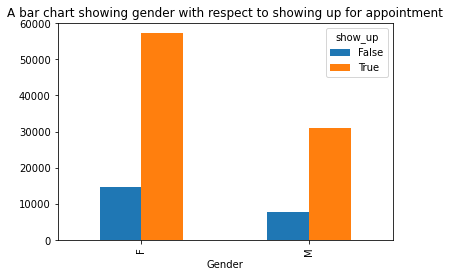

In [48]:
# Gender Distribution of showing up for appointment
title='A bar chart showing gender with respect to showing up for appointment'
chisqt.plot(kind='bar', title=title);

In [49]:
# run chi-square test for independence
chi2_contingency(chisqt)
print ('p-value:', chi2_contingency(chisqt)[1].round(4))

p-value: 0.172


##### Decision
> Since p-value (0.172) is not less than $\alpha=0.05$, we do not reject $H_0$.

##### Conclusion
>We say, there is no significant relationship between patient's gender and showing up for appointments.

<a id='Q3'></a>
### Research Question 3: Is there a relationship between Neighbourhood and Showing up for Appointments?


<a href="#top">List of Questions</a>

In [50]:
#To create a contigency table
chisqt = pd.crosstab(data['Neighbourhood'], data['show_up'], margins = False)
chisqt.head()

show_up,False,True
Neighbourhood,,
AEROPORTO,1,7
ANDORINHAS,521,1741
ANTÔNIO HONÓRIO,50,221
ARIOVALDO FAVALESSA,62,220
BARRO VERMELHO,91,332


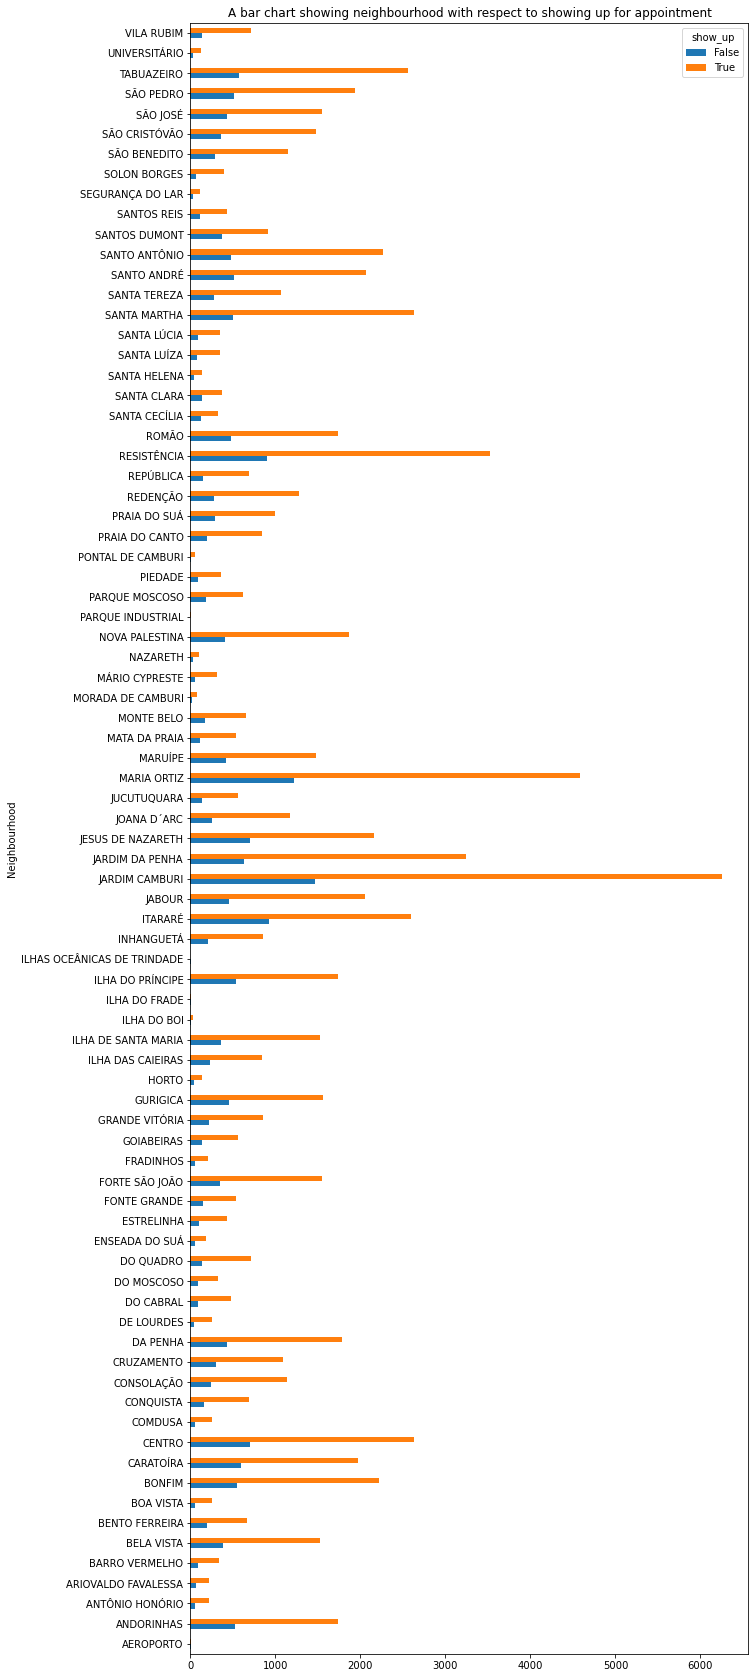

In [51]:
# Neighbourhood Distribution of showing up for appointment

title='A bar chart showing neighbourhood with respect to showing up for appointment'
chisqt.plot(kind='barh', title=title, figsize=(10,30));

In [52]:
# run chi-square test for independence
chi2_contingency(chisqt)
print ('p-value:', chi2_contingency(chisqt)[1].round(4))

p-value: 0.0


##### Decision
> Since p-value (0.0) is less than $\alpha=0.05$, we reject $H_0$.

##### Conclusion
>We say, there is a significant relationship between patient's neighbourhood and showing up for appointments.

<a id='Q4'></a>
### Research Question 4: Is there a relationship between Alcoholism and Showing up for Appointments?

<a href="#top">List of Questions</a>

In [53]:
#To create a contigency table
chisqt = pd.crosstab(data['Alcoholism'], data['show_up'], margins = False)
chisqt.head()

show_up,False,True
Alcoholism,,
False,21637,85524
True,677,2683


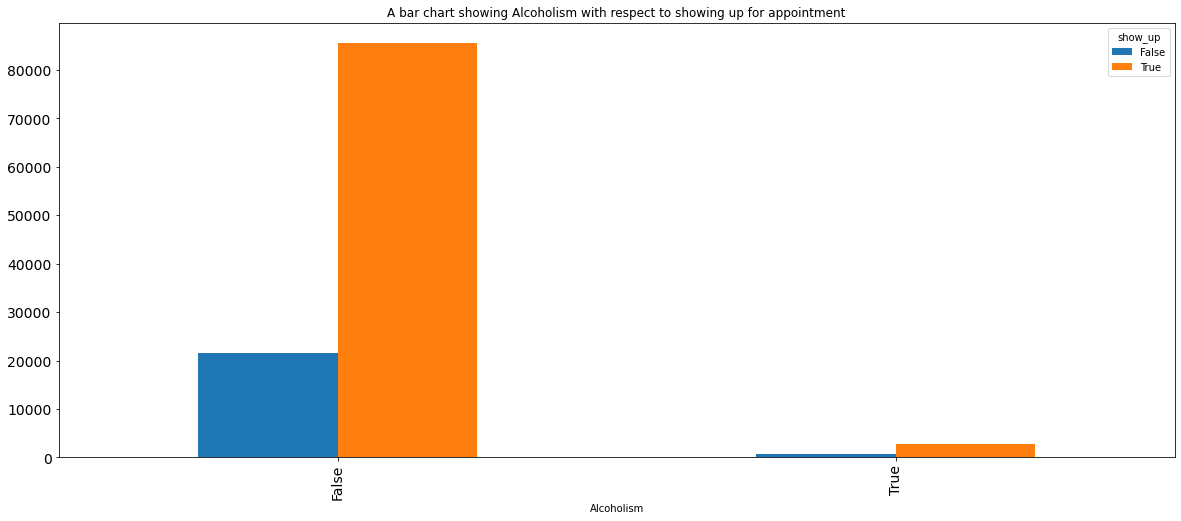

In [54]:
# Alcoholism Distribution of showing up for appointment

title='A bar chart showing Alcoholism with respect to showing up for appointment'
chisqt.plot(kind='bar', title=title, figsize=(20,8), fontsize=14);

In [55]:
# run chi-square test for independence
chi2_contingency(chisqt)
print ('p-value:', chi2_contingency(chisqt)[1].round(4))

p-value: 0.9694


##### Decision
> Since p-value (0.9694) is not less than $\alpha=0.05$, we do not regect $H_0$.

##### Conclusion
>We say, there is no significant relationship between Alcoholism and showing up for appointments.

<a id='Q5'></a>
### Research Question 5: Is there a relationship between individual illments and showing for appointments?


<a href="#top">List of Questions</a>

#### For Handicap

In [56]:
hc=data.groupby('show_up')['Handicap'].mean()
hc

show_up
False    0.020212
True     0.022742
Name: Handicap, dtype: float64

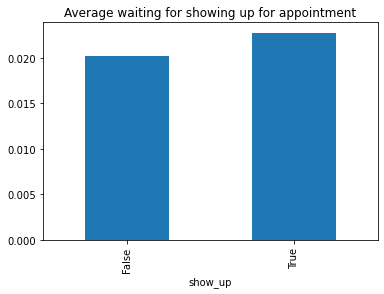

In [57]:
hc.plot(kind='bar', title='Average waiting for showing up for appointment');

show_up   False   True
Handicap              
0         21909  86373
1           364   1676
2            37    146
3             3     10
4             1      2
p-value: 0.1123


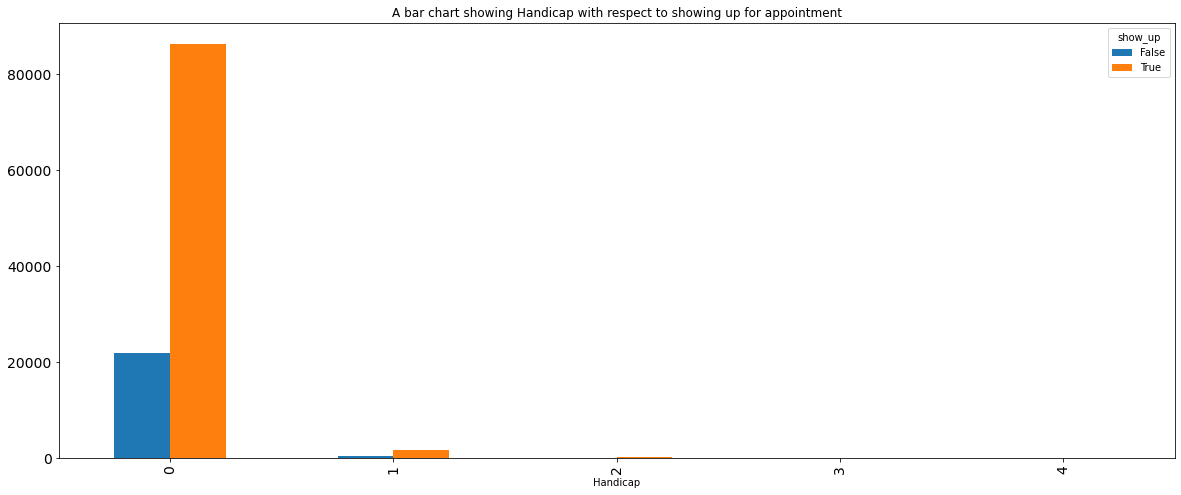

In [58]:
#To create a contigency table
chisqt = pd.crosstab(data['Handicap'], data['show_up'], margins = False)
print(chisqt.head())

# run chi-square test for independence
chi2_contingency(chisqt)
print ('p-value:', chi2_contingency(chisqt)[1].round(4))

# Handicap Distribution of showing up for appointment

title='A bar chart showing Handicap with respect to showing up for appointment'
chisqt.plot(kind='bar', title=title, figsize=(20,8), fontsize=14);



##### Decision
> Since p-value (0.1123) is not less than $\alpha=0.05$, we do not regect $H_0$.

##### Conclusion
>We say, there is no significant relationship between patient's being handicap and showing up for appointments.

#### For Hipertension

In [59]:
#To create a contigency table
chisqt = pd.crosstab(data['Hipertension'], data['show_up'], margins = False)
chisqt.head()

show_up,False,True
Hipertension,,
False,18542,70178
True,3772,18029


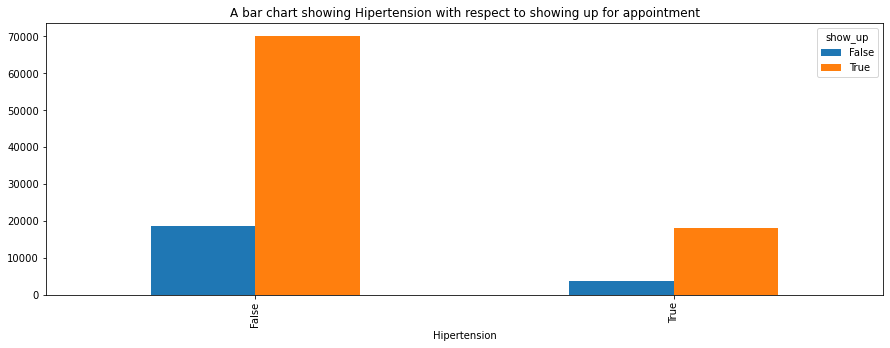

In [60]:
# Hipertension Distribution of showing up for appointment

title='A bar chart showing Hipertension with respect to showing up for appointment'
chisqt.plot(kind='bar', title=title, figsize=(15,5));

In [61]:
# run chi-square test for independence
chi2_contingency(chisqt)
print('p-value:', chi2_contingency(chisqt)[1].round(4))


p-value: 0.0


##### Decision
> Since p-value (0.0) is less than $\alpha=0.05$, we regect $H_0$.

##### Conclusion
>We say, there is a significant relationship between Hipertension patients and showing up for appointments.

#### Diabetes

In [62]:
#To create a contigency table
chisqt = pd.crosstab(data['Diabetes'], data['show_up'], margins = False)
chisqt.head()

show_up,False,True
Diabetes,,
False,20884,81694
True,1430,6513


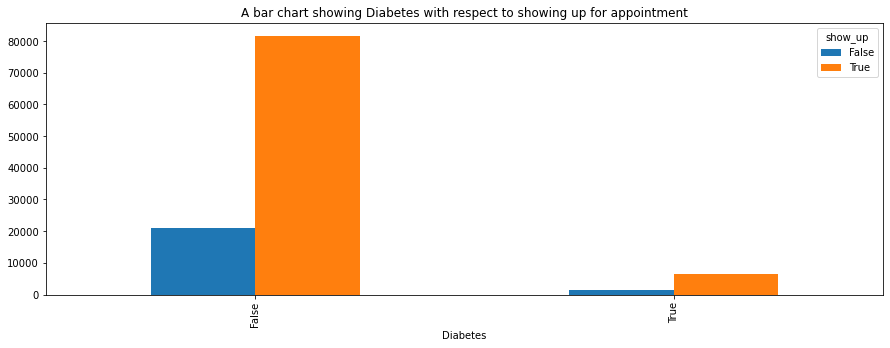

In [63]:
# Diabetes Distribution of showing up for appointment

title='A bar chart showing Diabetes with respect to showing up for appointment'
chisqt.plot(kind='bar', title=title, figsize=(15,5));

In [64]:
# run chi-square test for independence
chi2_contingency(chisqt)
print('p-value:', chi2_contingency(chisqt)[1].round(4))


p-value: 0.0


##### Decision
> Since p-value (0.0) is less than $\alpha=0.05$, we reject $H_0$.

##### Conclusion
>We say, there is a significant relationship between Diabetic patients  and showing up for appointments.

<a id='Q6'></a>
### Research Question 6: Does waiting time affect showing up for appointments?


<a href="#top">List of Questions</a>

In [65]:
wt=data.groupby('show_up')['Waiting_time'].mean().round()
wt

show_up
False    16.0
True      9.0
Name: Waiting_time, dtype: float64

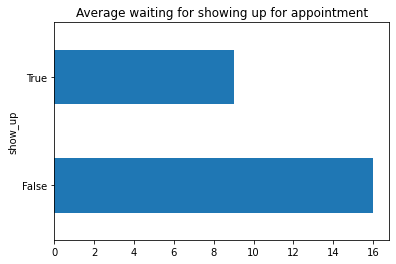

In [66]:
wt.plot(kind='barh', title='Average waiting for showing up for appointment');

##### Observation
>The bar chart above indcate that patients who attend appointments have a less waiting time than patients who don’t. 

> In this data wee see that more patients didn't show up having an average of 16 days of waiting before the appointment while patients will show up more having an average of 8 days or less of waiting before the appointment.

>Invariably, we can say waiting time affects whether a patient will show up for an appointment or not.

<a id='Q7'></a>
### Research Question 7: Is there a relationship between scholarship and showing for appointments?

<a href="#top">List of Questions</a>

In [67]:
#To create a contigency table
chisqt = pd.crosstab(data['Scholarship'], data['show_up'], margins = False)
chisqt.head()

show_up,False,True
Scholarship,,
False,19736,79924
True,2578,8283


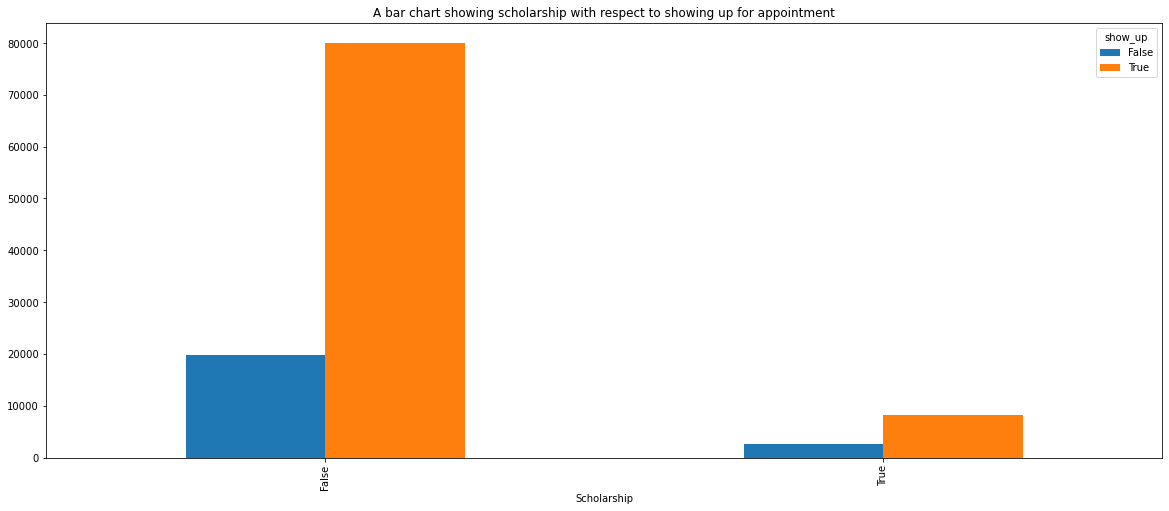

In [68]:
# Neighbourhood Distribution of showing up for appointment

title='A bar chart showing scholarship with respect to showing up for appointment'
chisqt.plot(kind='bar', title=title, figsize=(20,8));

In [69]:
# run chi-square test for independence
chi2_contingency(chisqt)
print ('p-value:', chi2_contingency(chisqt)[1].round(4))

p-value: 0.0


##### Decision
> Since p-value (0.0) is less than $\alpha=0.05$, we reject $H_0$.

##### Conclusion
>We say, there is a significant relationship between patient being on scholarship and showing up for appointments.

<a id='Q8'></a>
### Research Question 8: Is there a relationship between absence of "scholarship, illments, alcholism" and showing for appointments?


<a href="#top">List of Questions</a>

In [70]:
no_illment = data[(data.Scholarship==False) & (data.Hipertension==False) & (data.Diabetes==False) & (data.Alcoholism==False) & (data.Handicap<1) & (data.SMS_received==False)]
no_illment.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Waiting_time,show_up
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,0,True
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,0,True
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,0,True
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,0,False,2,False
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,0,False,2,False


In [71]:
#To create a contigency table
chisqt = pd.crosstab(no_illment['Scholarship'], no_illment['show_up'], margins = False)
chisqt.head()

show_up,False,True
Scholarship,,
False,8642,42394


In [72]:
print(no_illment['show_up'].value_counts())
no_illment['show_up'].value_counts(normalize=True).mul(100).astype(str)+'%'

True     42394
False     8642
Name: show_up, dtype: int64


True      83.06685476918254%
False    16.933145230817463%
Name: show_up, dtype: object

<AxesSubplot:>

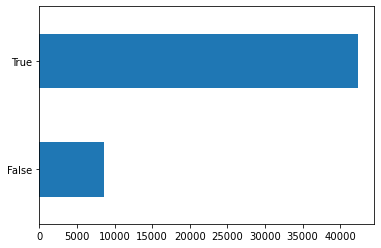

In [73]:
no_illment.show_up.value_counts().sort_values().plot(kind = 'barh')

> Here we observed that even in    the  absence of scholarships, illments, alcholism and SMS reminder, people still have a high turn up to medical appointments

<a id='Q9'></a>
### Research Question 9: Is there a relationship between SMS Received and showing for appointments?

<a href="#top">List of Questions</a>

In [74]:
#To create a contigency table
chisqt = pd.crosstab(data['SMS_received'], data['show_up'], margins = False)
chisqt.head()

show_up,False,True
SMS_received,,
False,12530,62509
True,9784,25698


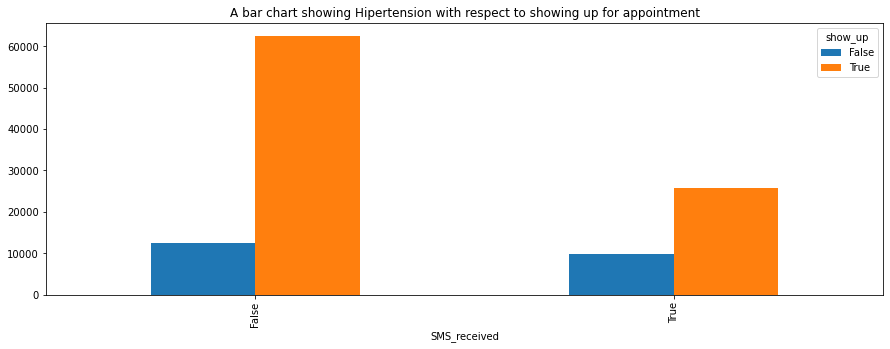

In [75]:
# Hipertension Distribution of showing up for appointment

title='A bar chart showing Hipertension with respect to showing up for appointment'
chisqt.plot(kind='bar', title=title, figsize=(15,5));

In [76]:
# run chi-square test for independence
chi2_contingency(chisqt)
print ('p-value:', chi2_contingency(chisqt)[1].round(4))

p-value: 0.0


<a id='conclusions'></a>
## Conclusions

>1. In generally, the number of patients that attended medical appointments is greater than the number of patients that didn't show up for medical apppointment. From a total of **110,521 patients**, **88,207(80%) patients** showed up while **22,314(20%) patients** didn't show up.
>2. Gender, Alcoholism and if a patient is Handicap have no significant relationship with whether a patient will show up for a medical appointment or not.
>4. Neighbourhood, waiting time, Scholarship and follow-up SMS affects whether a patient will show up for a medical appointment or not.
>4. We realised that patients illment(Diabetes or Hipertension) affects whether a patient will show up for a medical appointment or not.
>6. we also tested to see if patients without these illments, alcholism, Scholarships, not handicap and did not recieve SMS tend to show up too, and we realised that in the group of patients with no illments, alcholism, Scholarships, not handicap and did not recieve SMS, that medical appointments turn up yet is greater than the number of patients that didn't show up for medical apppointment. From a total of **51,036 patients**, **42,394(83%) patients** showed up while **8,642(17%) patients** didn't show up. **which shows** that people on a norm will tend to attend medical appointments. **note that this can be further investigated, as people may be influenced be other factors not mentioned.** 

>**Limitation(s):** Data is not properly organised.



### Navigation
<a href="#Q1">1. Distribution of Patient's Age.</a></li></br>
<a href="#Q2">2. Is there a relationship between gender and showing up for appointments?</a></li></br>
<a href="#Q3">3. Is there a relationship between Neighbourhood and showing up for appointments?</a></li></br>
<a href="#Q4">4. Is there a relationship between alcoholism and showing for appointments?</a></li></br>
<a href="#Q5">5. Is there a relationship between individual illments and showing for appointments?</a></li></br>
<a href="#Q6">6. Does waiting time affect showing up for appointments?</a></li></br>
<a href="#Q7">7. Is there a relationship between scholarship and showing for appointments?</a></li></br>
<a href="#Q8">8. Is there a relationship between absence of "scholarship, illments, alcholism" and showing for appointments?</a></li></br>
<a href="#Q9">9: Is there a relationship between SMS Recieved and showing for appointments?</a></li>

<li><a href="#eda">Back to Exploratory Data Analysis</a></li>
<li><a href="#top">Back to Top</a></li>